In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("data/dataset.csv").fillna("Unknown")
pd.set_option('display.float_format',  '{:,.3f}'.format)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000,0,10.800,1.400,1.740,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.667,0,13.900,-0.300,0.790,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000,0,10.800,1.400,1.740,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400,0,9.400,-0.800,-3.120,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000,0,13.900,-0.300,0.790,Graduate


In [3]:


for c in data.columns[:-1]:
    data[c] = pd.to_numeric(data[c], errors = 'raise')

x = data[[column for column in data.columns[:-1]]]

x = np.asarray(x)



In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(data["Target"])
data["Target"] = encoder.transform(data["Target"])

y = data[["Target"]]
y = np.asarray(y)

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.2,random_state=10)

In [6]:
from sklearn.linear_model import LogisticRegressionCV

In [7]:
mdl = LogisticRegressionCV(max_iter=2000).fit(x_train,y_train.ravel())


In [8]:
yhat = mdl.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,log_loss,ConfusionMatrixDisplay

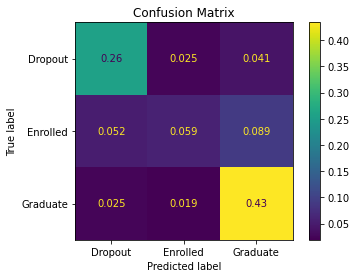

In [10]:
mat = confusion_matrix(y_test, yhat, normalize = 'all')
cmat = ConfusionMatrixDisplay(confusion_matrix=mat,display_labels = [encoder.inverse_transform([i])[0] for i in np.unique(y)])
cmat.plot()
plt.title("Confusion Matrix")
plt.show()

In [12]:
print("Other Metrics:\n1. accuracy score: %.5f \n2. Log Loss: %.5f" % (accuracy_score(y_test,yhat),log_loss(y_test,mdl.predict_proba(x_test))))

Other Metrics:
1. accuracy score: 0.74915 
2. Log Loss: 0.62096
